In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'


In [3]:
generic_ccbar = base_file_loc + 'ccbar/*.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [4]:
base_filter='D0_M>0'


In [5]:
tree = 'etaeta_gg_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_daughterDiffOfPhi_0_1","Eta_1_daughterAngle_0_1","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_daughterDiffOfPhi_0_1","Eta_2_daughterAngle_0_1","Eta_2_isSignal",\
             "gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             "gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             "gamma3_E","gamma3_clusterNHits","gamma3_clusterReg",\
             "gamma4_E","gamma4_clusterNHits","gamma4_clusterReg",\
             "dM_pi0","ROE_Mgg",'veto_isSignal',\
             "dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             "dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             "dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "dM_pi0_75MeV_3","ROE_Mgg_75MeV_3",'veto_isSignal_75MeV_3',\
             "dM_pi0_75MeV_4","ROE_Mgg_75MeV_4",'veto_isSignal_75MeV_4',\
             "Pis_dr","Pis_dz"
            ]



In [6]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_84:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_95:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_102:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [7]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [8]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

1056987
1876587
0.563249665483135


In [47]:
cut = 'D0_M>0.0'
cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2. & Eta_1_daughterAngle_0_1<1.7 & abs(Eta_2_daughterDiffOfPhi_0_1)<2. & Eta_2_daughterAngle_0_1<1.7'
cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011 &  dM_pi0_75MeV_3>0.011 &  dM_pi0_75MeV_4>0.011'
# cut += ' & Eta_1_M>0.53 &  Eta_1_M<0.56 & Eta_2_M>0.53 &  Eta_2_M<0.56'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [48]:
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/D0etaeta_gg_tag"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [49]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

xrange = (1.6,2.1)
nbins=50
xlabel = ''
img_path = ''

In [50]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple(),unit="[GeV/c^2]"):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

[ 229.  235.  229.  208.  214.  222.  196.  212.  203.  156.  163.  170.
  153.  170.  144.  137.  137.  132.  146.  148.  148.  171.  251.  473.
  757. 1010. 1035.  816.  423.  242.  119.   70.   84.   79.   75.   84.
   58.   72.   51.   75.   51.   58.   44.   50.   41.   51.   56.   52.
   41.   32.]
fitst_bin_entries=229.0


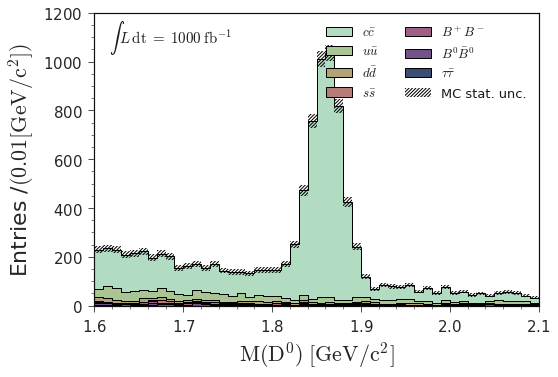

In [51]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_D0M.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_tight_selv0_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[  44.   64.   78.   85.   86.  109.  110.  136.  135.  139.  189.  379.
  892. 1609. 1122.  448.  240.  180.  163.  146.  160.  158.  131.  135.
  128.  122.  155.  152.  131.  135.  136.  110.  114.  111.  117.  127.
  113.  115.  114.  109.  118.  119.  115.  117.  128.  118.  123.  113.
   78.   90.]
fitst_bin_entries=44.0


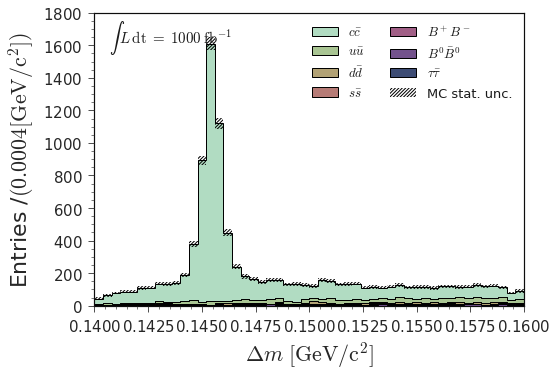

In [52]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta m$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_Dstarp_delM.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_tight_selv0_Dstarp_delM.png"


# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 6241.  6361.  6678.  7118.  7420.  7549.  8261.  8922.  9186.  9932.
 10434. 11580. 11850. 12828. 13954. 14803. 16258. 17778. 19466. 21340.
 23462. 25624. 28790. 31140. 34846. 38135. 41905. 46735. 51088. 54885.
 59341. 63339. 66442. 68345. 62936. 57938. 53085. 47252. 43160. 38803.
 34554. 30550. 27632. 25735. 23032. 20900. 19386. 17539. 16447. 15071.]
fitst_bin_entries=6241.0


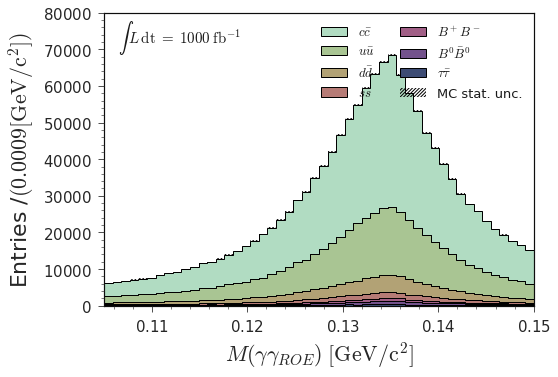

In [29]:
var = 'ROE_Mgg_50MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.105,0.150)
nbins = 50
xlabel = "$M(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_ROE_Mgg_50MeV.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[864574.      0.      0. 565389.]
fitst_bin_entries=864574.0


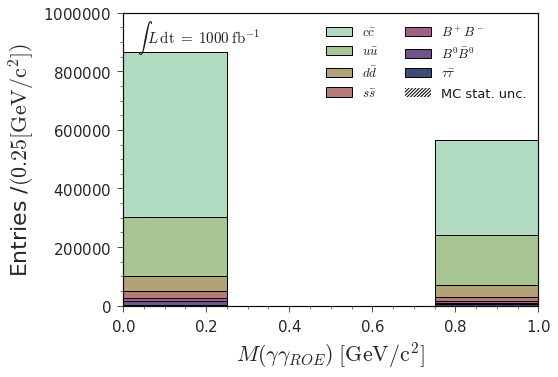

In [32]:
var = 'veto_isSignal_50MeV'
xrange = (0,1)
nbins = 4
xlabel = "$M(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_veto_isSignal_50MeV.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 5802.  6064.  6385.  6588.  6887.  7067.  7761.  8187.  8453.  9029.
  9458. 10408. 10900. 11758. 12580. 13460. 14577. 15892. 17219. 19103.
 20956. 22877. 25729. 27688. 30854. 33784. 36985. 40999. 44594. 47924.
 51244. 54254. 56222. 57481. 53323. 49367. 45419. 40466. 37095. 33546.
 29918. 26477. 23985. 22297. 19970. 18053. 16788. 15264. 14404. 13278.]
fitst_bin_entries=5802.0


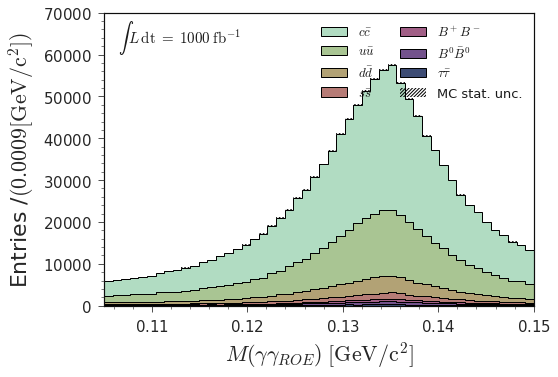

In [30]:
var = 'ROE_Mgg_75MeV'
xrange = (0.105,0.150)
nbins = 50
xlabel = "$M(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_ROE_Mgg_75MeV.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[1021366.       0.       0.  538203.]
fitst_bin_entries=1021366.0


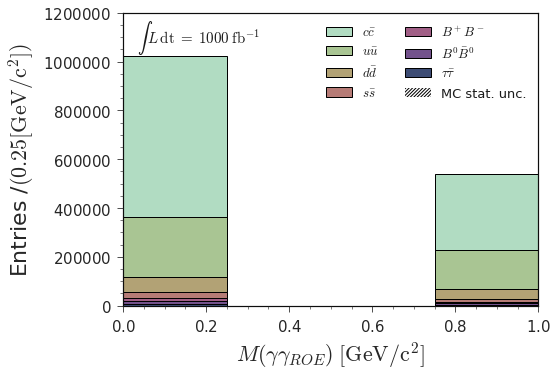

In [33]:
var = 'veto_isSignal_75MeV'
xrange = (0,1)
nbins = 4
xlabel = "$M(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_veto_isSignal_75MeV.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[873218. 325689. 175454. 119954.  90693.  72616.  59428.  50689.  44083.
  37925.  30462.  26226.  24707.  23200.  21612.  20314.  19293.  17936.
  16875.  15456.  15186.  14230.  13713.  12861.  12090.  11401.  11182.
  10808.  10532.   9885.   9279.   9076.   8573.   8401.   7942.   7793.
   7608.   7386.   7476.   7610.   8087.   7423.   6146.   5244.   4930.
   4672.   3888.   3531.   3256.   3120.]
fitst_bin_entries=873218.0


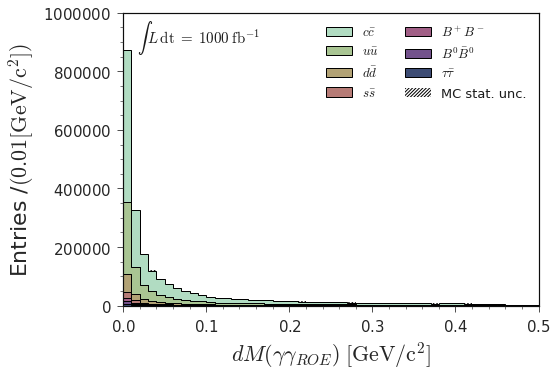

In [38]:
var = 'dM_pi0_75MeV'
xrange = (0,0.5)
nbins = 50
xlabel = "$dM(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_dM_pi0_75MeV.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[243533. 208758. 172412. 137668. 110847.  89595.  73437.  61903.  53628.
  47126.  41909.  38084.  34513.  31563.  29385.  27329.  25365.  23740.
  22289.  21231.  20150.  19130.  17813.  17058.  16542.  15846.  15098.
  14038.  14290.  13344.  12517.  12419.  11778.  11436.  11278.  10876.
  10356.  10132.   9990.   9335.   9329.   9316.   9046.   8408.   7984.
   8088.   7764.   7578.   7357.   7138.]
fitst_bin_entries=243533.0


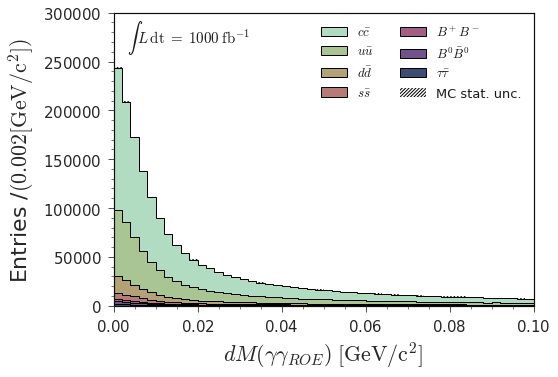

In [39]:
var = 'dM_pi0_75MeV'
xrange = (0,0.1)
nbins = 50
xlabel = "$dM(\gamma \gamma_{ROE})$"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_dM_pi0_75MeV_zoom.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[38914. 38619. 38294. 38972. 40016. 40537. 41120. 41317. 41445. 41822.
 41864. 42060. 42278. 42846. 43725. 43835. 43661. 44134. 44056. 43857.
 44340. 43949. 42834. 42451. 41485. 40606. 41266. 41148. 41413. 41684.
 42350. 43278. 44588. 46061. 48407. 50476. 52999. 56567. 57930. 59536.
 61102. 61761. 62488. 63087. 63239. 63915. 63270. 62977. 61798. 59076.]
fitst_bin_entries=38914.0


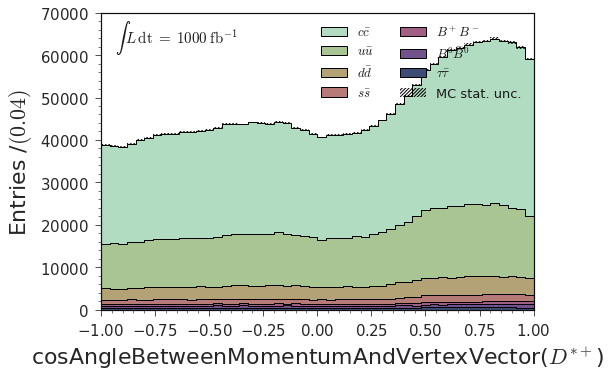

In [44]:
var = "Dstarp_cosAngleBetweenMomentumAndVertexVector"

xrange = (-1,1)
nbins = 50
xlabel = "cosAngleBetweenMomentumAndVertexVector($D^{*+}$)"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_Dstarp_cosAngleBetweenMomentumAndVertexVector.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="")

[192734.  81149.  62894.  54081.  48399.  44447.  41545.  39551.  37594.
  35813.  34674.  33819.  32469.  31811.  31196.  31317.  30543.  30307.
  30028.  30036.  29788.  29695.  30320.  30501.  30389.  30483.  30272.
  30471.  30615.  31025.  31554.  31870.  32230.  32991.  33850.  34764.
  35363.  36763.  37976.  39432.  41388.  43263.  46115.  48877.  52402.
  57856.  65593.  77358. 100683. 241159.]
fitst_bin_entries=192734.0


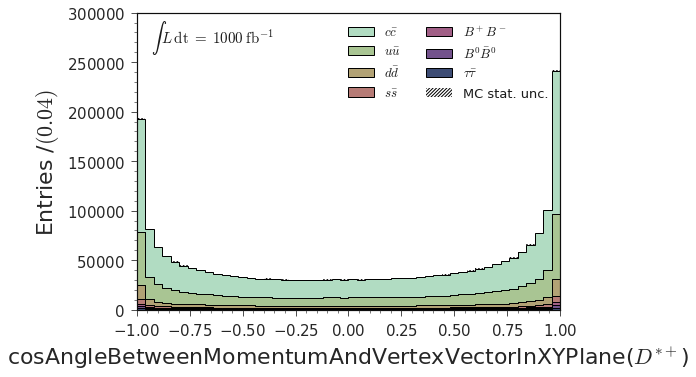

In [43]:
var = "Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane"

xrange = (-1,1)
nbins = 50
xlabel = "cosAngleBetweenMomentumAndVertexVectorInXYPlane($D^{*+}$)"

img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="")